In [1]:
import dynamo as dyn
import matplotlib.pyplot as plt
import numpy as np

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


In [2]:
#dyn.configuration.set_pub_style(scaler=10)
#matplotlib.use('agg')

In [3]:
adata = dyn.read('./data/pancreatic_endocrinogenesis_g4000_dyn.h5ad')
adata

AnnData object with n_obs × n_vars = 3696 × 4000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'PCs', 'cell_phase_genes', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'grid_velocity_umap', 'neighbors', 'pca', 'pca_mean', 'pp', 'umap_fit'
    obsm: 'X', 'X_pca', 'X_scv', 'X_umap', 'cell_cy

In [4]:
adata

AnnData object with n_obs × n_vars = 3696 × 4000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'PCs', 'cell_phase_genes', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'grid_velocity_umap', 'neighbors', 'pca', 'pca_mean', 'pp', 'umap_fit'
    obsm: 'X', 'X_pca', 'X_scv', 'X_umap', 'cell_cy

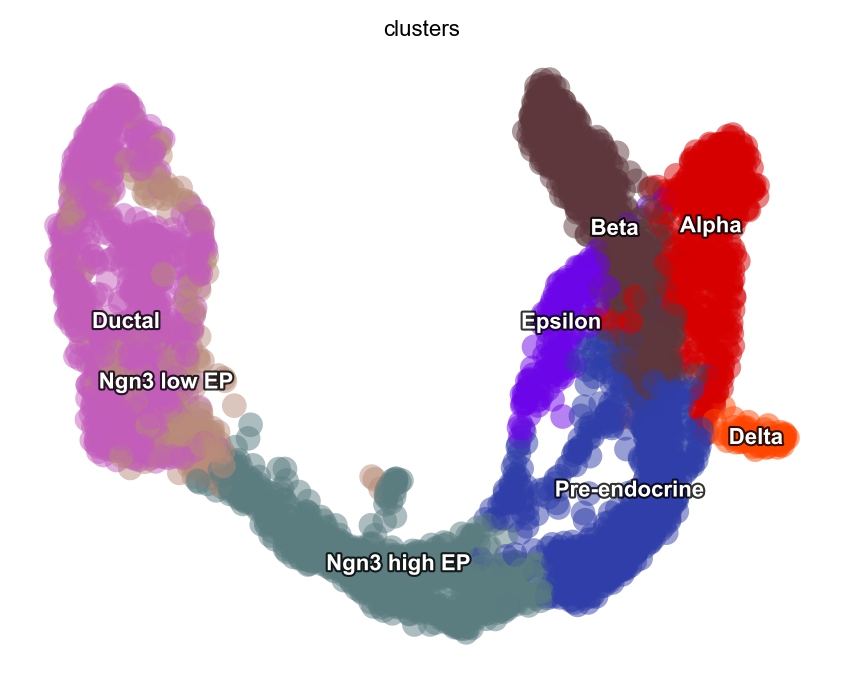

In [5]:
dyn.pl.scatters(adata, basis='scv', color='clusters', pointsize=0.3, alpha=0.5)#, save_show_or_return='save', save_kwargs={'dpi':100})

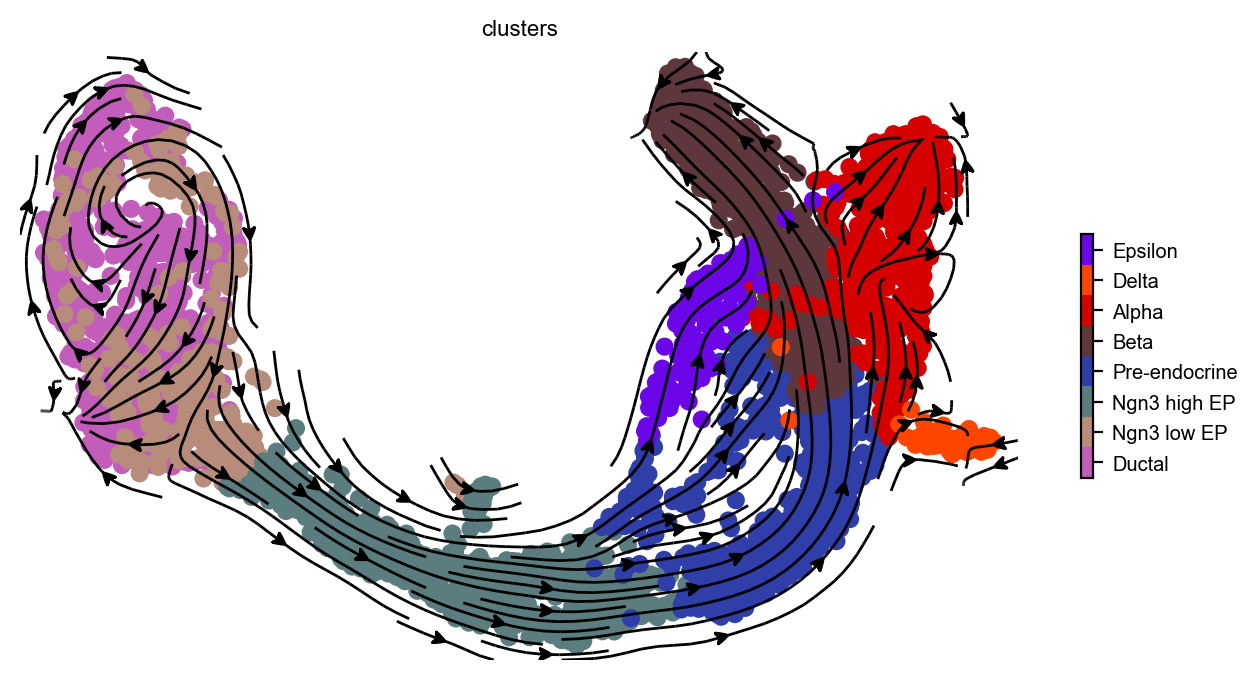

In [6]:
plt.figure(figsize=(8, 4))
dyn.pl.zscatter(adata, basis='scv', color='clusters')
dyn.pl.zstreamline(adata, basis='scv', constant_lw=True)

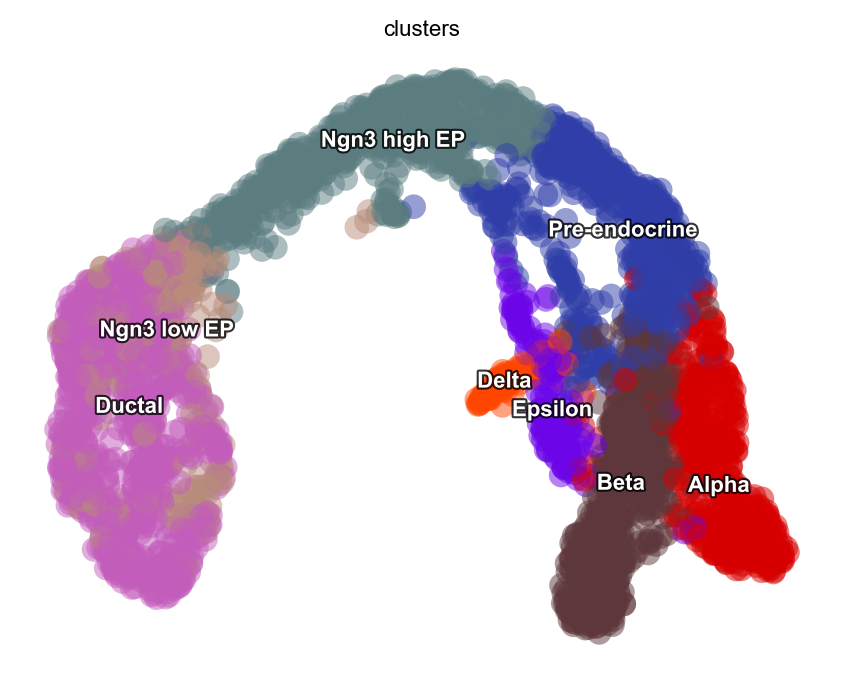

In [7]:
dyn.pl.scatters(adata, basis='umap', color='clusters', pointsize=0.3, alpha=0.5)

In [8]:
dyn.vf.VectorField(adata, basis='pca', ndims=30, M=1000)
plt.figure(figsize=(8, 4))
dyn.pl.zscatter(adata, basis='pca_SparseVFC', color='clusters')
dyn.pl.zstreamline(adata, basis='pca_SparseVFC', constant_lw=True)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...


Calculating divergence: 100%|████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.04it/s]


<Figure size 600x400 with 0 Axes>

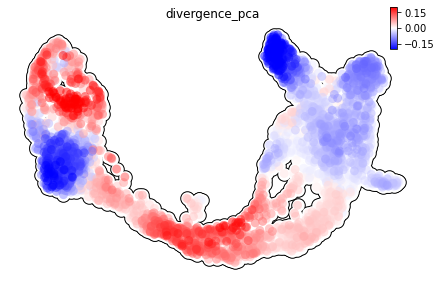

In [ ]:
dyn.vf.divergence(adata)
dyn.pl.scatters(adata, basis='scv', color='divergence_pca', 
                cmap='bwr', sym_c=True, sort='abs', frontier=True, pointsize=0.3, alpha=0.5)

<Figure size 600x400 with 0 Axes>

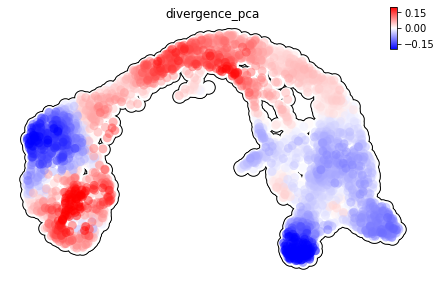

In [ ]:
dyn.pl.scatters(adata, basis='umap', color='divergence_pca', 
                cmap='bwr', sym_c=True, sort='abs', frontier=True, pointsize=0.3, alpha=0.5)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\scVectorField.py:1168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

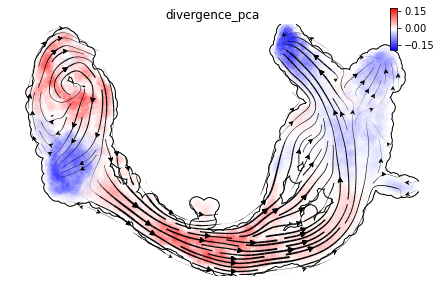

In [ ]:
dyn.pl.streamline_plot(adata, basis='scv', color='divergence_pca',
                      cmap='bwr', sym_c=True, sort='abs', frontier=True, pointsize=0.3, alpha=0.5)#, save_show_or_return='save', save_kwargs={'ext':'png', 'dpi':100})

|-----> [Calculating acceleration] in progress: 100.0000%
|-----> [Calculating acceleration] finished [0.1401s]
|-----> <insert> acceleration to layers in AnnData Object.


<Figure size 600x400 with 0 Axes>

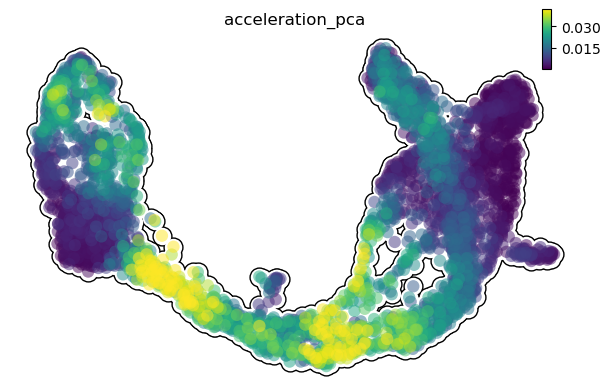

In [ ]:
dyn.vf.acceleration(adata, basis='pca')
dyn.pl.scatters(adata, basis='scv', color='acceleration_pca', 
                cmap='viridis', frontier=True, pointsize=0.3, alpha=0.5)#, save_show_or_return='save', save_kwargs={'dpi':100})

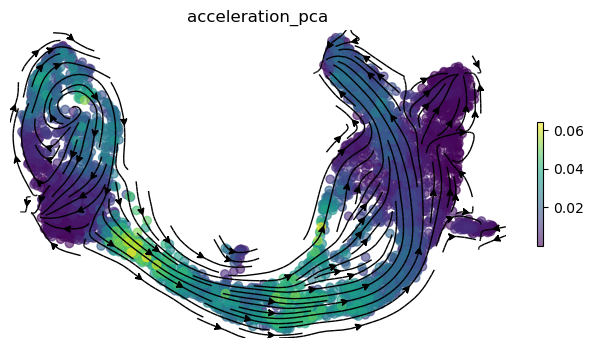

In [ ]:
plt.figure(figsize=(8,4))
dyn.pl.zscatter(adata, basis='scv', color='acceleration_pca', cmap='viridis', alpha=0.6)
dyn.pl.zstreamline(adata, basis='scv', constant_lw=True)

In [ ]:
#dyn.ext.ddhodge(adata)

In [ ]:
#plt.figure(figsize=(8,4))
#dyn.pl.zscatter(adata, basis='scv', color='pca_ddhodge_potential', cmap='viridis', alpha=0.6)
#dyn.pl.zstreamline(adata, basis='scv', constant_lw=True)

In [ ]:
pancreas_genes = ['Hes1', 'Nkx6-1', 'Nkx2-2','Neurog3', 'Neurod1', 'Pax4', 'Pax6', 'Arx', 
                  'Pdx1', 'Ins1', 'Ins2', 'Ghrl', 'Ptf1a', 'Iapp', 'Isl1', 'Sox9', 'Gcg']

In [ ]:
#dyn.pp.top_pca_genes(adata, n_top_genes=100)
dyn.vf.jacobian(adata, regulators=pancreas_genes)

Transforming subset Jacobian: 100%|█████████████████████████████████████████████| 3696/3696 [00:00<00:00, 38602.60it/s]


AnnData object with n_obs × n_vars = 3696 × 4000
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'divergence_pca', 'acceleration_pca', 'jacobian_det_pca'
    var: 'highly_variable_genes', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'PCs', 'cell_phase_genes', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'grid_velocity_pca', 'grid_velocity_scv', 'gri

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


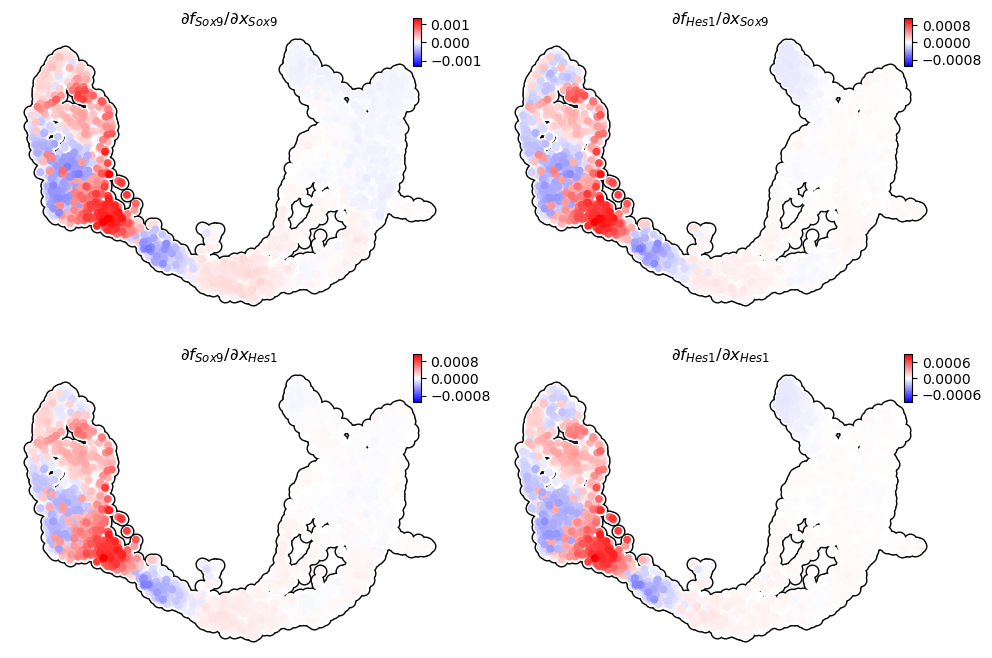

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Hes1', 'Sox9'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


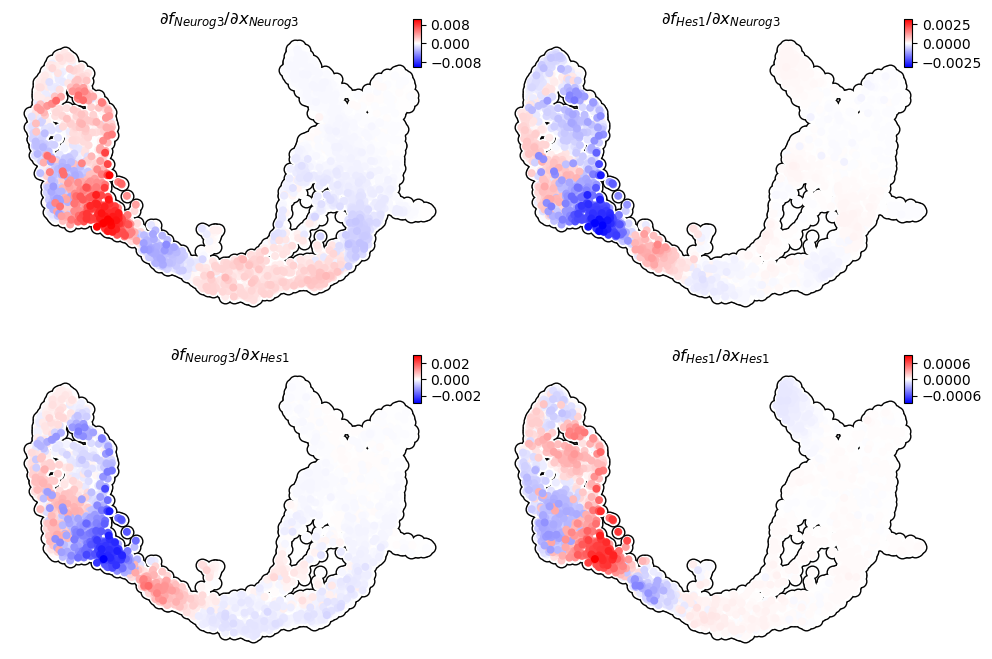

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Hes1', 'Neurog3'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


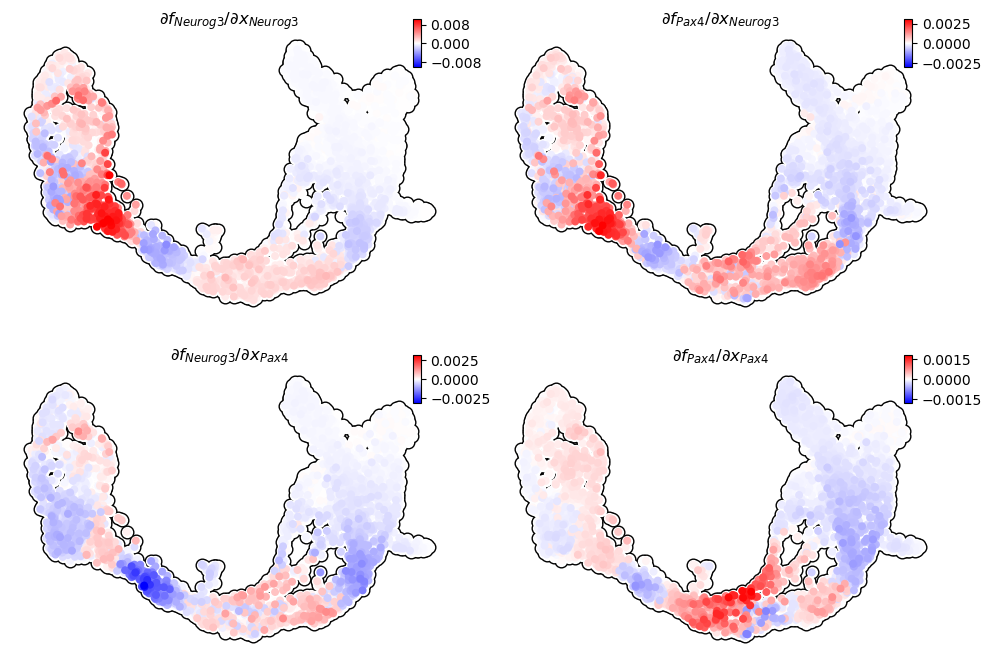

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Neurog3', 'Pax4'], alpha=1)#, save_show_or_return='save', save_kwargs={'dpi':100})

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


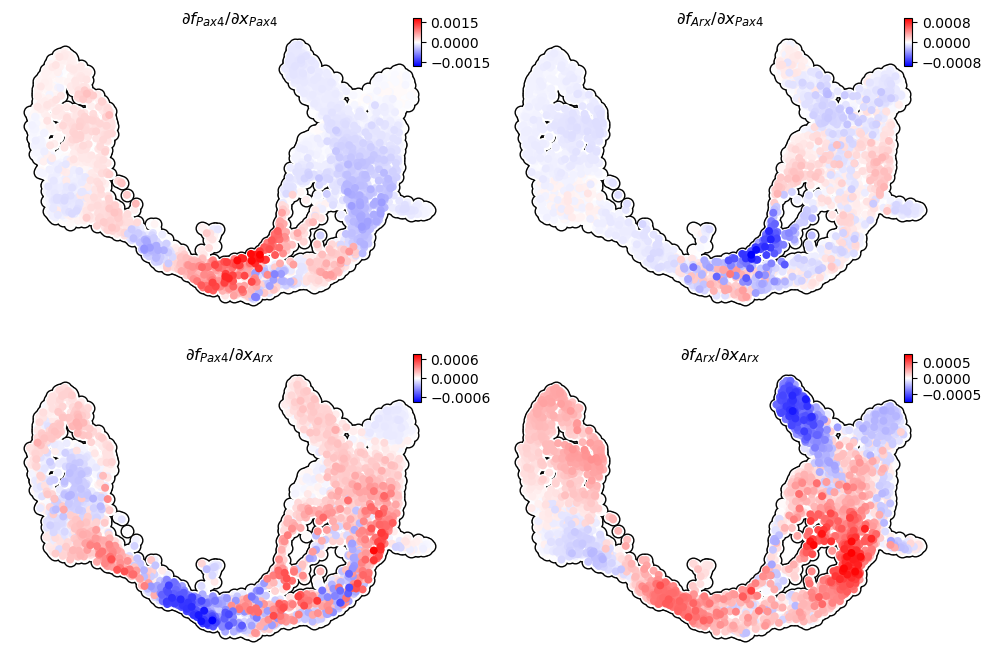

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Arx', 'Pax4'], alpha=1)#, save_show_or_return='save', save_kwargs={'dpi':100})

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


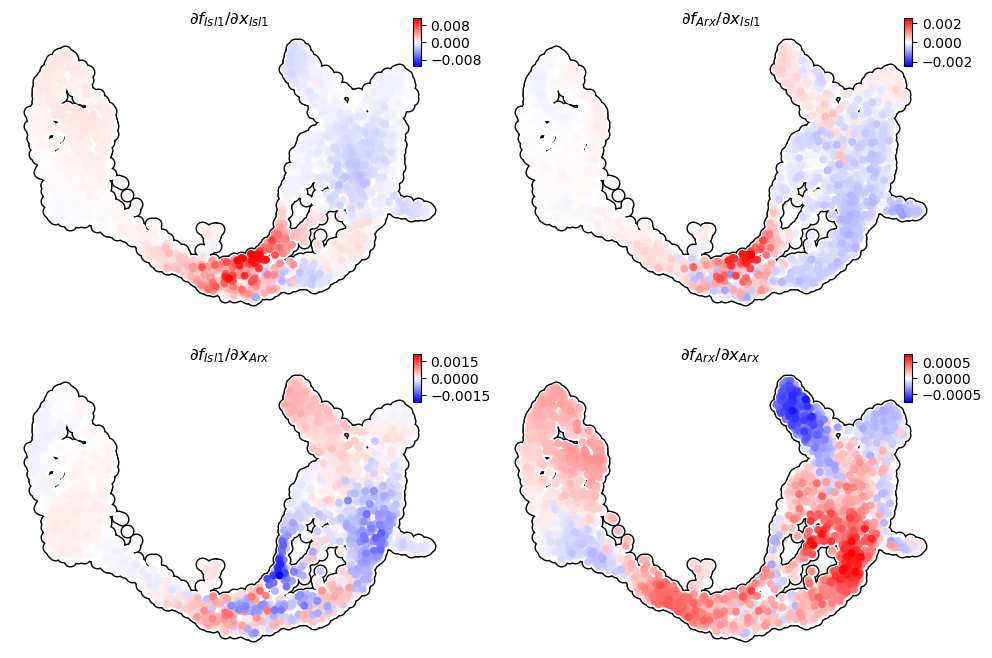

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Arx', 'Isl1'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


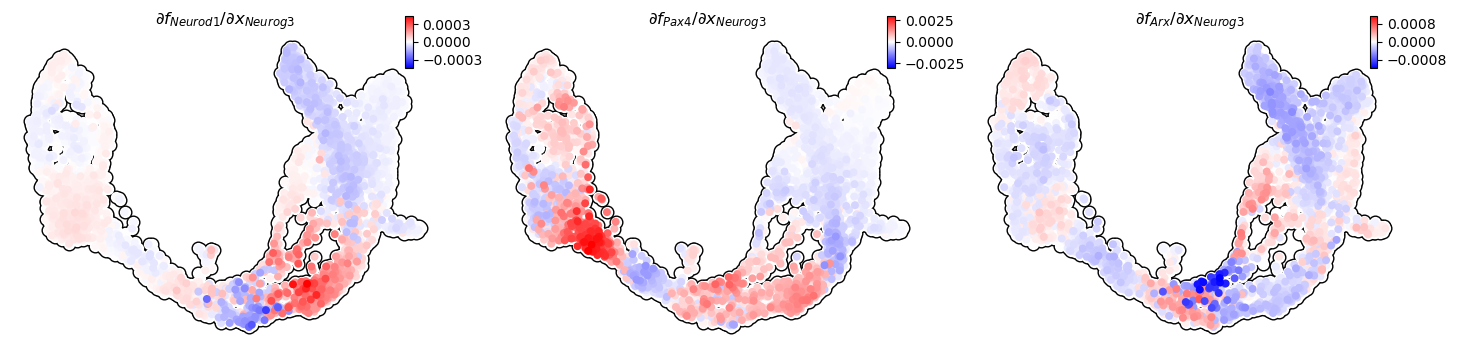

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Neurog3'], effectors=['Arx', 'Pax4', 'Neurod1'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


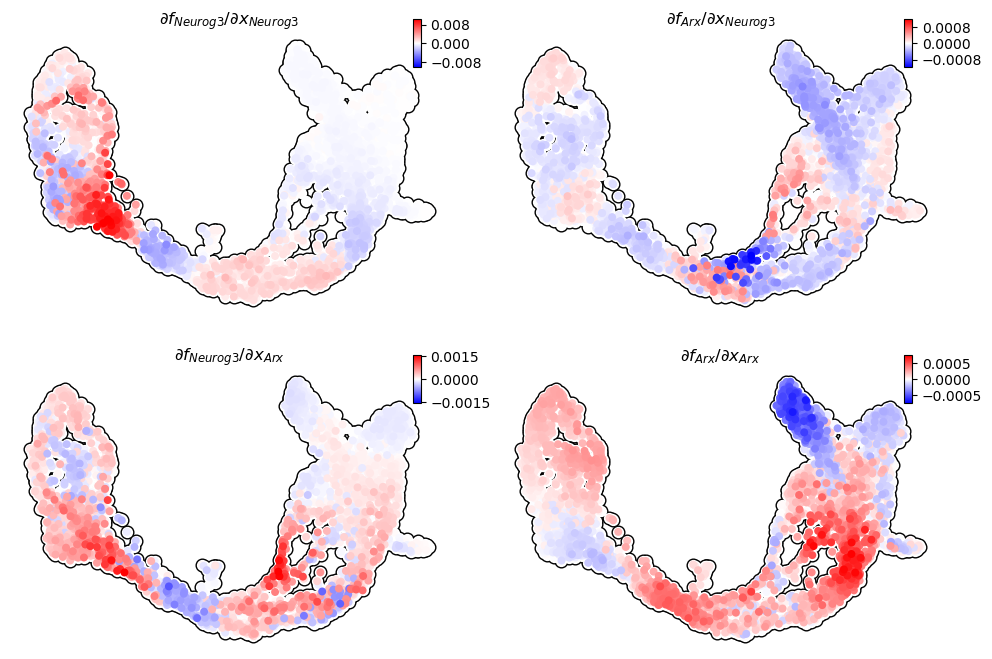

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Neurog3', 'Arx'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


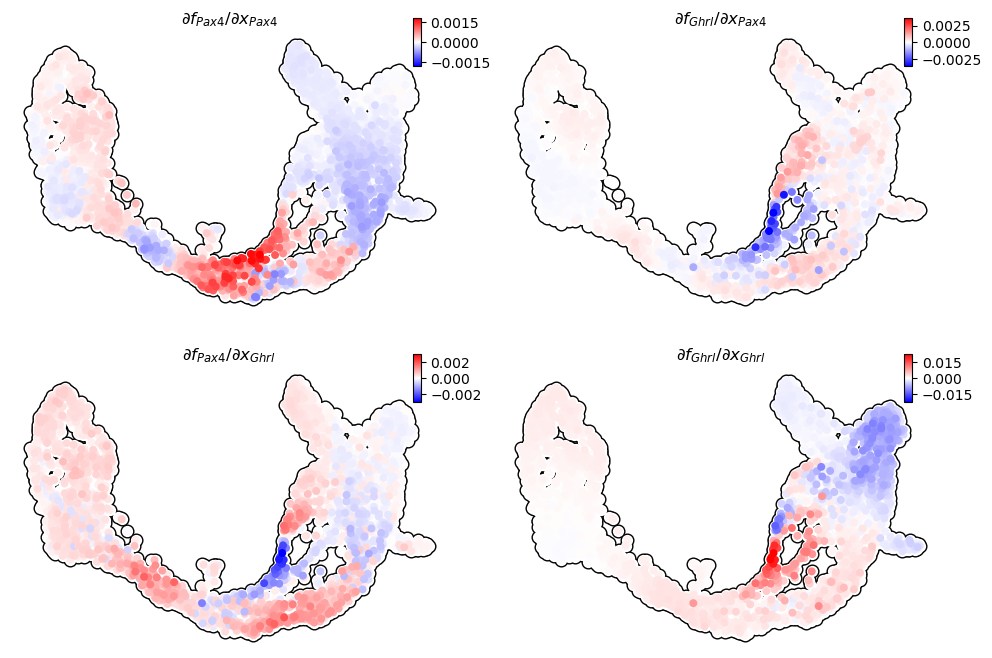

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Pax4', 'Ghrl'], alpha=1)

In [ ]:
#dyn.pl.jacobian(adata, basis='scv', regulators=['Neurog3'], effectors=['Pax4'], alpha=1, save_show_or_return='save', save_kwargs={'dpi':100})

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


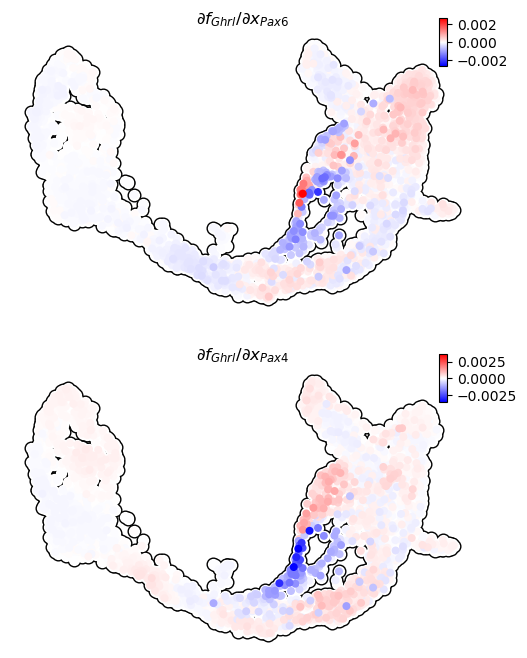

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Pax4', 'Pax6'], effectors=['Ghrl'], alpha=1)#, save_show_or_return='save', save_kwargs={'dpi':100})

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


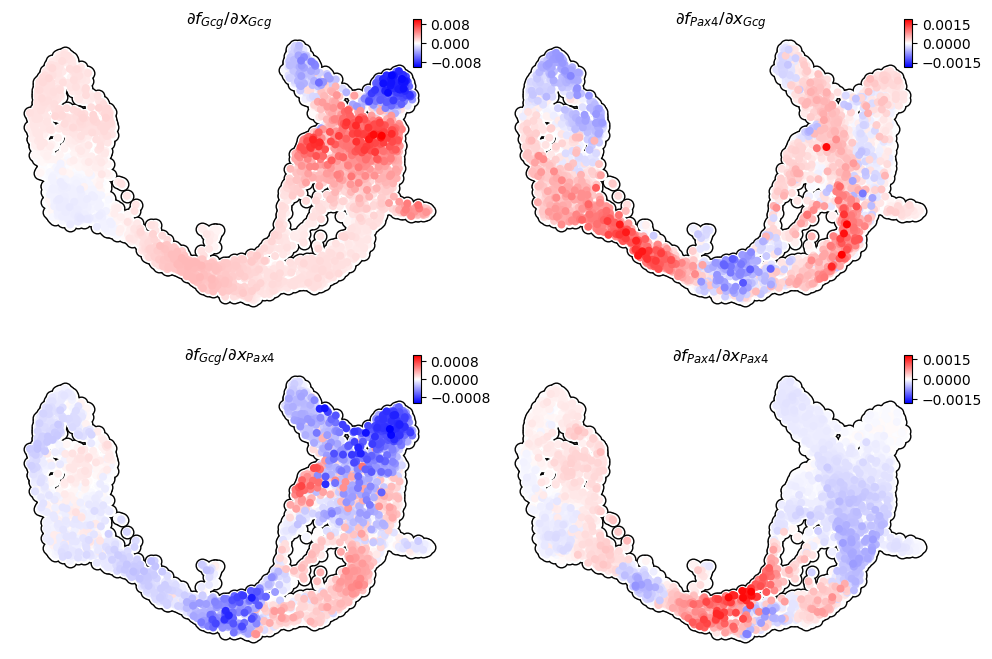

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Pax4', 'Gcg'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


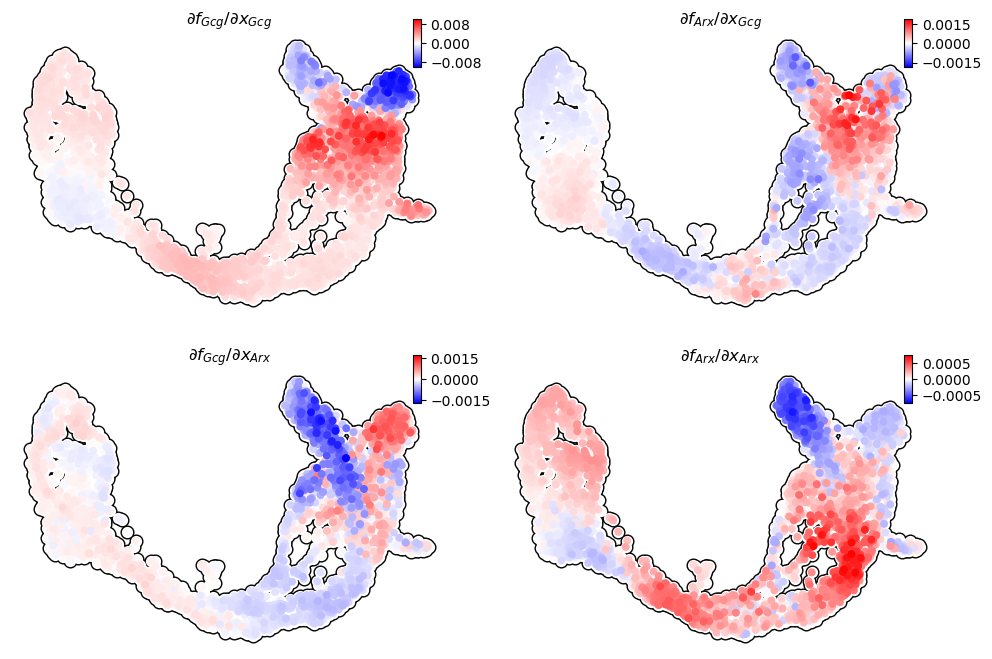

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Arx', 'Gcg'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


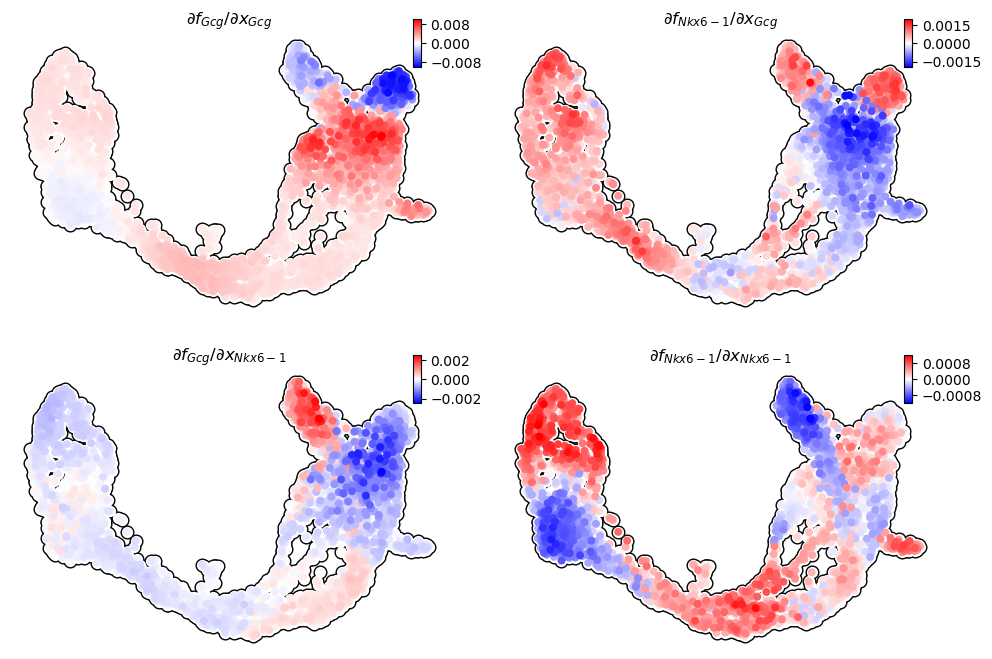

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Nkx6-1', 'Gcg'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


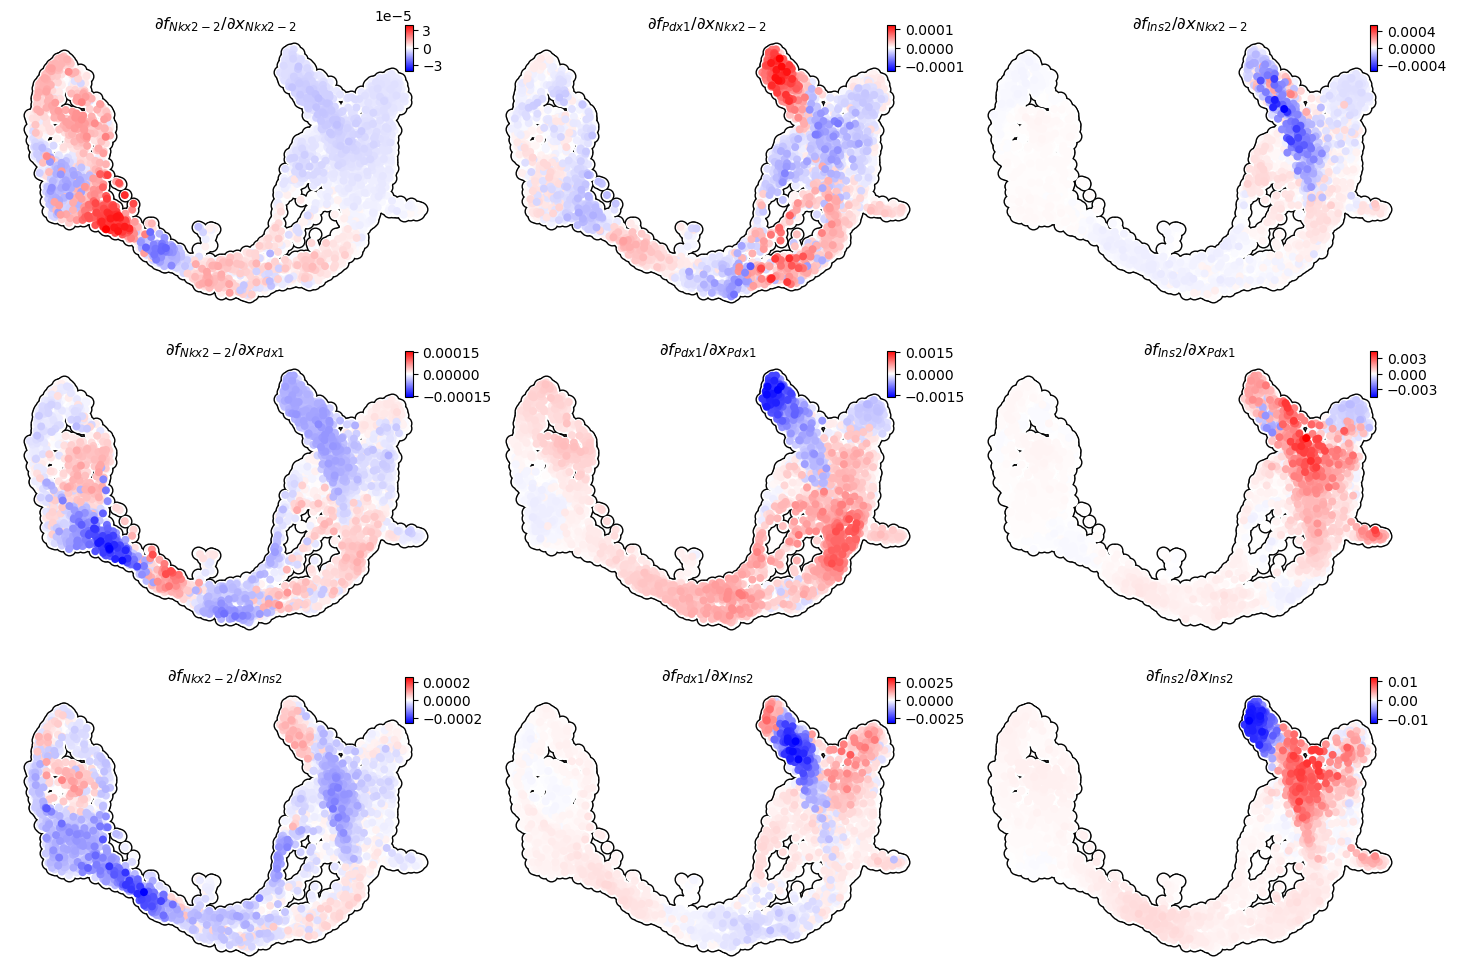

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Nkx2-2', 'Ins2', 'Pdx1'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


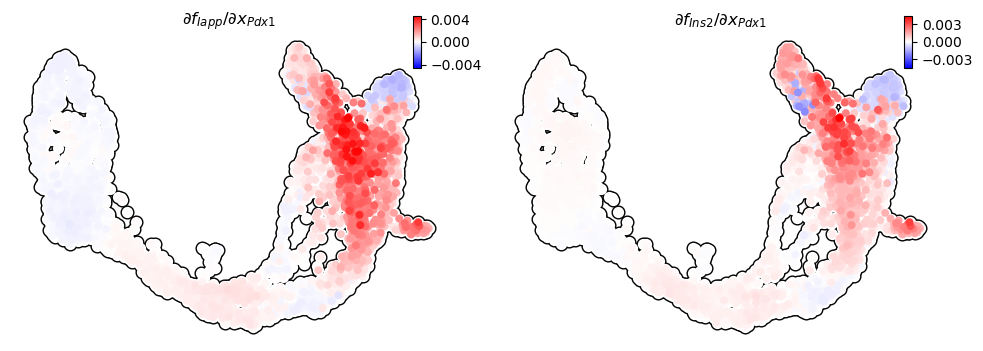

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Pdx1'], effectors=['Ins1', 'Ins2', 'Iapp'], alpha=1)#, save_show_or_return='save', save_kwargs={'dpi':100})

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


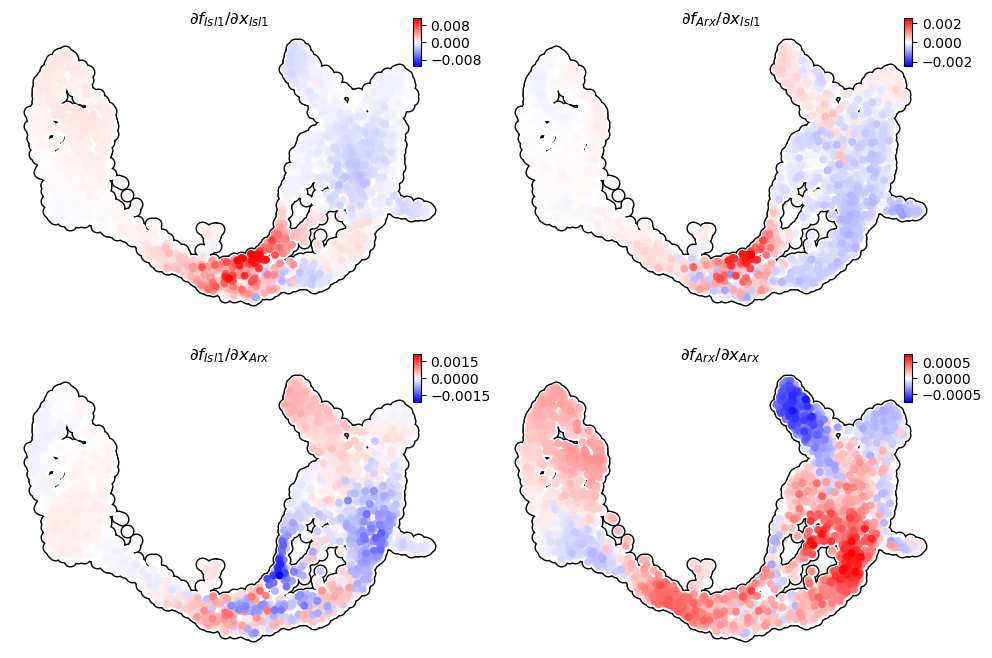

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Isl1', 'Arx'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


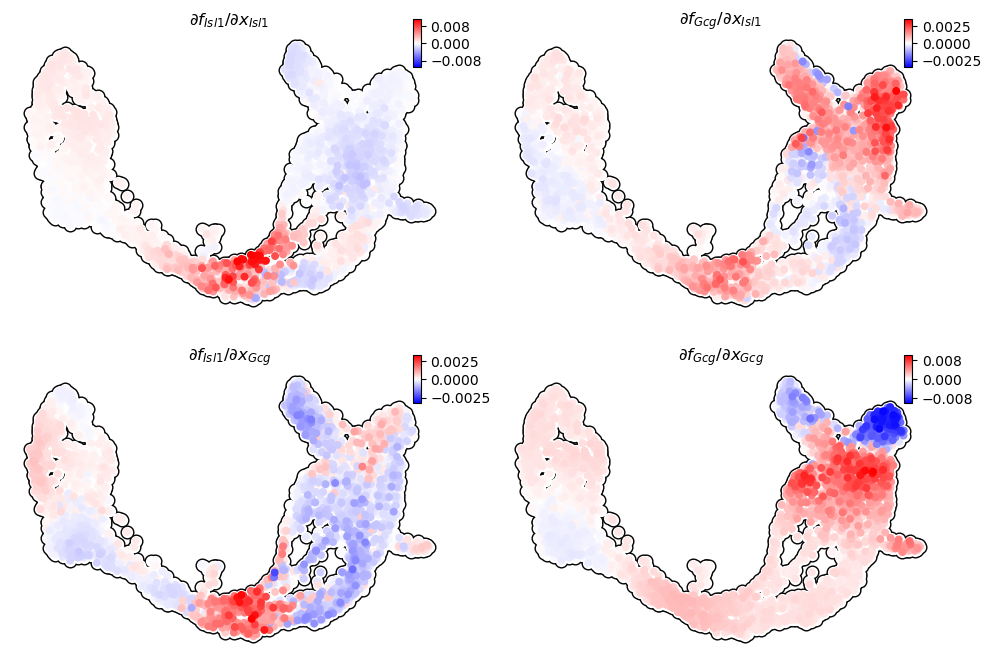

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Isl1', 'Gcg'], alpha=1)

E:\Yan\Xing Lab\dynamo-release\dynamo\plot\vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


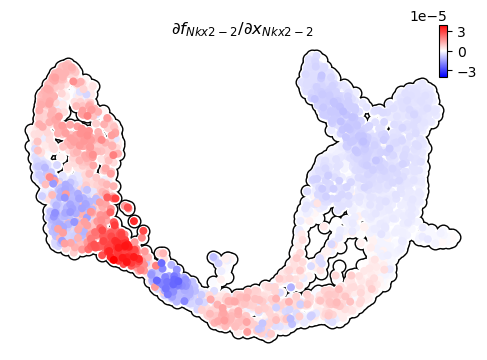

In [ ]:
dyn.pl.jacobian(adata, basis='scv', regulators=['Nkx2-2', 'Sst'], alpha=1)

In [ ]:
for g in adata.var.index:
    if g.startswith('Gata'):
        print(g)

Gata6
Gatad2b
